<a href="https://colab.research.google.com/github/dhahbimohamed/ml-zero-to-expert/blob/main/04__Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔹 What is a Decision Tree?**
A decision tree is a machine learning model that makes predictions by asking a series of "yes or no" questions based on the features  of the data. It splits the dataset into smaller groups at each step by selecting the most informative feature, usually using entropy  or Gini impurity. This continues until it reaches a stopping point, such as a maximum depth . Decision trees are easy to interpret and useful for both classification and regression tasks.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = pd.DataFrame(iris.data,columns=iris.feature_names)
y = iris.target
print(X.head())
print(y[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(max_depth=1,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


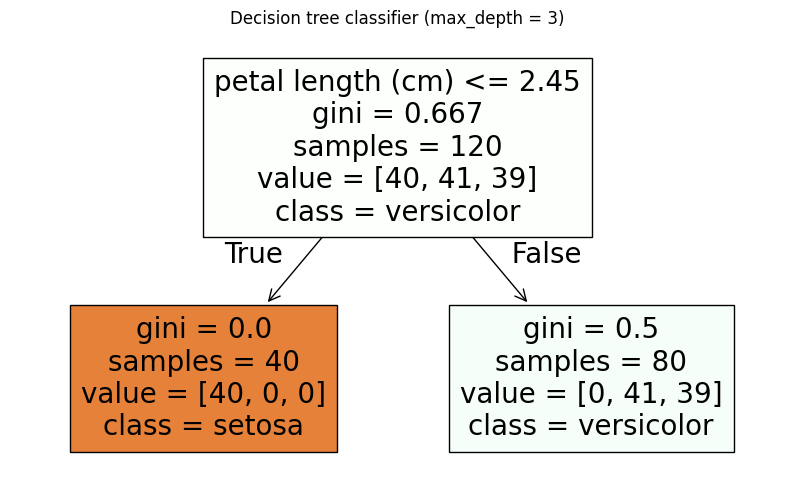

In [9]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=iris.target_names))
plt.figure(figsize=(10,6))
plot_tree(model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title("Decision tree classifier (max_depth = 3)")
plt.show()


# **🔹 What Does max_depth Control?**
The max_depth parameter limits how many levels the tree can grow. A deeper tree can learn more complex patterns but might also memorize the training data, leading to overfitting . A shallower tree might generalize better but could underfit if it's too simple.

**A deeper tree = more complex = more prone to overfitting.**

In [10]:
for depth in [1, 3, 5]:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    print(f"\nDepth: {depth}")
    print(classification_report(y_test, model.predict(X_test)))



Depth: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30


Depth: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Depth: 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **🔹 What Causes Overfitting?**
Overfitting happens when the precision and recall = 1 the model becomes too complex and learns the noise in the training data instead of the real patterns. In decision trees, this usually happens when:

**.**The tree grows too deep

**.**There is no pruning or regularization

**.**The model fits perfectly on the training set but performs poorly on unseen data



# **🔹 My Confidence Level**
I’d rate my confidence in understanding decision trees at 7/10. I understand how the model splits data and what max_depth does, but I still need more practice to fully grasp metrics like precision  and recall, and to improve my ability to explain things clearly.